### AcO_rM1Pos_FEM

In [1]:
import dos
from IPython.display import Image
path = './dos/AcO_M1Pos_FEM'

INFO:DOS:Reading config from ./dos/AcO_M1Pos_FEM/dos.yaml
INFO:DOS:New driver: M1
INFO:M1:New input: Txyz
INFO:M1:New input: Rxyz
INFO:M1:New input: modes
INFO:M1:No inputs!
INFO:DOS:New driver: M2
INFO:M2:New input: Txyz
INFO:M2:New input: Rxyz
INFO:M2:No inputs!
INFO:DOS:New driver: wfs48
INFO:wfs48:No inputs!
INFO:wfs48:New output: M12_RBM
INFO:wfs48:Output logged in!
INFO:DOS:New driver: AcO_controller_debug
INFO:AcO_controller_debug:New input: x_hat
INFO:AcO_controller_debug:New output: M1 TxyzRxyz_d
INFO:AcO_controller_debug:Output logged in!
INFO:AcO_controller_debug:New output: M2 Txyz_d
INFO:AcO_controller_debug:Output logged in!
INFO:AcO_controller_debug:New output: M2 Rxyz_d
INFO:AcO_controller_debug:Output logged in!
INFO:AcO_controller_debug:New output: M1 BM_d
INFO:AcO_controller_debug:Output logged in!
INFO:DOS:New driver: AcO_controller
INFO:AcO_controller:New input: x_hat
INFO:AcO_controller:New output: M1 Txyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:

SIMCEO server received: Acknowledging connection from SIMCEO client!


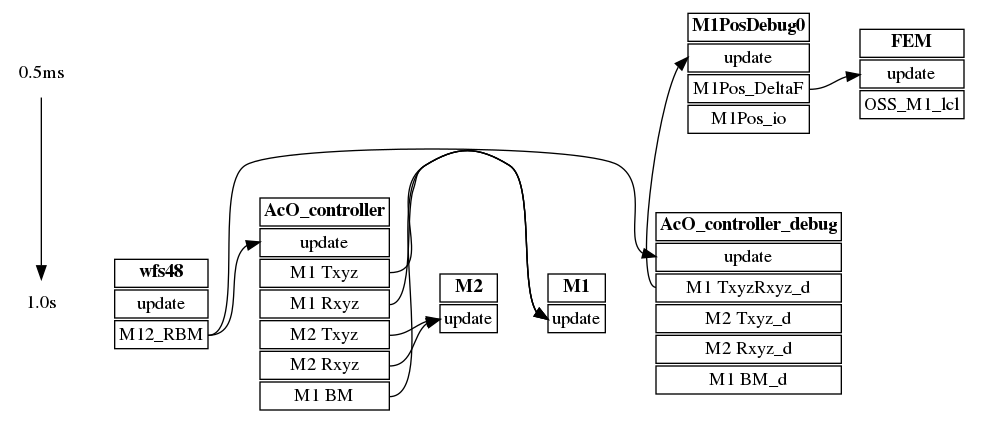

In [2]:
# init
sim = dos.DOS(path, 20, show_timing = 2)
Image(filename=path + '/timing.png')

In [ ]:
sim.start()

In [ ]:
sim.join()
sim.terminate()

logs = sim.logs.entries

# plot logs
---

In [ ]:
import matplotlib.pyplot as plt
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

import numpy as np

duration = sim.cfg['simulation']['duration']
xticks = np.arange(0, duration + 1, 1)

logs

---
Testing

In [ ]:
Txyz = logs['AcO_controller']['M1 Txyz'].timeSeries[1]
Rxyz = logs['AcO_controller']['M1 Rxyz'].timeSeries[1]
time = logs['M1PosDebug0']['M1Pos_DeltaF'].timeSeries[0]
TRxyz = np.concatenate((Txyz, Rxyz), axis = 1)

M1Pos_out = logs['M1PosDebug0']['M1Pos_DeltaF'].timeSeries[1]
M1Pos_io = logs['M1PosDebug0']['M1Pos_io'].timeSeries[1]
M1Pos_out_r = np.stack(np.split(M1Pos_out, 7, axis = 1), axis = 2)
M1Pos_io_r = np.stack(np.split(M1Pos_io, 7, axis = 1), axis = 2)

TRxyz = logs['AcO_controller_debug']['M1 TxyzRxyz_d'].timeSeries[1]
time = logs['M1PosDebug0']['M1Pos_io'].timeSeries[0]

FEM_TRxyz = logs['FEM']['OSS_M1_lcl'].timeSeries[1]

In [ ]:
TRxyz_ = TRxyz.reshape([42,21])

In [ ]:
ind = 9

plt.figure(figsize=(15,7))
plt.plot(time,M1Pos_io[:,ind])
plt.plot(time[::2000],TRxyz_[ind,:])
plt.plot(time,FEM_TRxyz[:,ind])
plt.show()

In [ ]:
# Select
seg =  1    #1 - 7
rbm = 'Tx'  # Tx Ty Tz Rx Ry Rz

# Plot ------
table = ['Tx','Ty','Tz','Rx','Ry','Rz']
rbm_index = table.index(rbm)
#plt.figure(figsize=(15,7))
fig1, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
#ax1.set_xticks(xticks)
ax1.set_title('AcO output - ' + rbm)
ax1.plot(time[::2000], TRxyz[seg - 1, rbm_index,:])

ax2.set_title('HP output - ' + rbm)
ax2.plot(time,M1Pos_out_r[:, rbm_index, seg - 1])
plt.show()

In [ ]:
Txyz = logs['AcO_controller']['M1 Txyz'].timeSeries[1]
Rxyz = logs['AcO_controller']['M1 Rxyz'].timeSeries[1]

In [ ]:
Txyz.shape

In [ ]:
TRxyz[0:6,-1]

In [ ]:
Txyz[0,:,-1]

In [ ]:
Rxyz[0,:,-1]

#### BM

In [ ]:
%matplotlib inline

BM = logs['AcO_controller']['M1 BM'].timeSeries[1]

plt.figure(figsize=(12,6))
plt.xticks(xticks)
for k in range(BM[0,:,:].shape[0]):
    plt.plot(BM[0,k,:])
plt.show()

#### x_hat

In [ ]:
wfs = logs['wfs48']['M12_RBM'].timeSeries[1]

plt.figure(figsize=(12,6))
plt.plot(wfs)
plt.show()

#### Hardpoints

In [ ]:
Txyz = logs['AcO_controller']['M1 Txyz'].timeSeries[1]
Rxyz = logs['AcO_controller']['M1 Rxyz'].timeSeries[1]
time = logs['M1Pos0']['M1Pos_out'].timeSeries[0]
TRxyz = np.concatenate((Txyz, Rxyz), axis = 1)

M1Pos_out = logs['M1Pos0']['M1Pos_out'].timeSeries[1]
M1Pos_out_r = np.stack(np.split(M1Pos_out, 7, axis = 1), axis = 2)

In [ ]:
# Select
seg =  1    #1 - 7
rbm = 'Tx'  # Tx Ty Tz Rx Ry Rz

# Plot ------
table = ['Tx','Ty','Tz','Rx','Ry','Rz']
rbm_index = table.index(rbm)
#plt.figure(figsize=(15,7))
fig1, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
#ax1.set_xticks(xticks)
ax1.set_title('AcO output - ' + rbm)
ax1.plot(time[::2000], TRxyz[seg - 1, rbm_index,:])

ax2.set_title('HP output - ' + rbm)
ax2.plot(time,M1Pos_out_r[:, rbm_index, seg - 1])
plt.show()

##### FEM
---

In [ ]:
FEM_time = logs['FEM']['OSS_M1_lcl'].timeSeries[0]
FEM_TRxyz = logs['FEM']['OSS_M1_lcl'].timeSeries[1]
FEM_TRxyz = np.stack(np.split(FEM_TRxyz, 6 , axis = 1), axis = 2)
FEM_TRxyz.shape

In [ ]:
# Select
seg =  1    #1 - 7
rbm = 'Tx'  # Tx Ty Tz Rx Ry Rz

# Plot ------
table = ['Tx','Ty','Tz','Rx','Ry','Rz']
rbm_index = table.index(rbm)
#plt.figure(figsize=(15,7))
fig1, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True, figsize=(15,12))
ax1.set_xticks(np.arange(0,20,2))
ax1.set_title('AcO output - ' + rbm)
ax1.plot(time[::2000], TRxyz[seg - 1, rbm_index,:])

ax2.set_title('HP output - ' + rbm)
ax2.plot(time,M1Pos_out_r[:, rbm_index, seg - 1])

ax3.set_title('FEM output - ' + rbm)
ax3.plot(FEM_time, FEM_TRxyz[:,seg -1, rbm_index])
plt.show()

## Testing
---